In [36]:
import tensorflow as tf
shape = (270, 480, 3)

In [37]:
bm = tf.keras.applications.ResNet50V2(
    include_top=False,
    input_shape=shape,
)
inputs = tf.keras.Input(shape=shape)
x = bm(inputs, training=False)
x.trainable = False
# x = tf.keras.layers.Conv2D(2048, (3, 3), activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(12, activation = 'relu')(x)
model = tf.keras.Model(inputs=inputs, outputs=x)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 270, 480, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 9, 15, 2048)       23564800  
                                                                 
 flatten_1 (Flatten)         (None, 276480)            0         
                                                                 
 dropout_1 (Dropout)         (None, 276480)            0         
                                                                 
 dense_1 (Dense)             (None, 12)                3317772   
                                                                 
Total params: 26882572 (102.55 MB)
Trainable params: 26837132 (102.38 MB)
Non-trainable params: 45440 (177.50 KB)
_________________________________________________________________


In [38]:
from defs.storage_locs import numpy_data_filepaths
import numpy as np
X_train = np.load(numpy_data_filepaths('train', '480x270')[0])
y_train = np.load(numpy_data_filepaths('train', '480x270')[1])

In [39]:
from defs.storage_locs import weights_file
model.load_weights(weights_file('fine_tuned_resnet50v2.h5'))

In [40]:
model.predict(X_train[[0]])

1/1 [==============================] - 1s 646ms/step


array([[ 251.59181,  558.3808 ,  626.1026 ,  482.2185 ,  830.72723,
         443.77078,  664.3138 ,  719.04083, 1030.5902 ,  544.19794,
        1190.2932 ,  465.94232]], dtype=float32)

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tools.label_extract import read_extracted_labels, labels_to_df, labels_to_simple_df, df_labels_to_point_list
from defs.storage_locs import extracted_image_path, extracted_label_path
from court_segment.plot_court_labels import plot_labels
from tools.visualization import plot_image

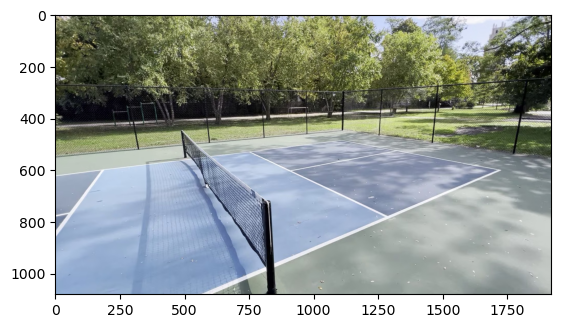

In [42]:
sample_img = cv2.imread(extracted_image_path('center_right_1', 0))
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
plt.imshow(sample_img)

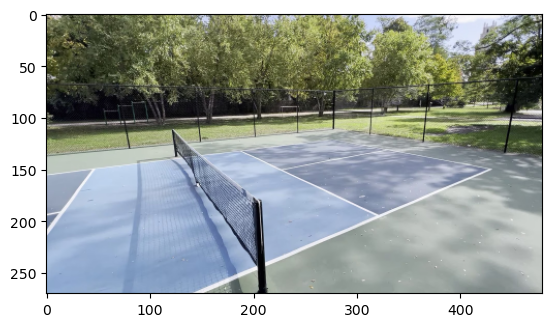

In [43]:
resized = cv2.resize(sample_img, (480, 270), interpolation=cv2.INTER_AREA)
plt.imshow(resized)

In [44]:
predictions = model.predict(resized.reshape(1, 270, 480, 3))

1/1 [==============================] - 0s 27ms/step


In [45]:
labels = predictions[0]
def group_points_by_2(points):
    # create list of points grouped by 2
    grouped_points = []
    for i in range(0, len(points), 2):
        grouped_points.append(points[i:i+2])
    return grouped_points
labels = group_points_by_2(labels)
labels

[array([1719.7008,  605.5119], dtype=float32),
 array([1316.9943,  527.2166], dtype=float32),
 array([1108.6204 ,  492.45044], dtype=float32),
 array([1284.8218,  785.6324], dtype=float32),
 array([918.3297 , 603.37476], dtype=float32),
 array([763.57605, 527.1907 ], dtype=float32)]

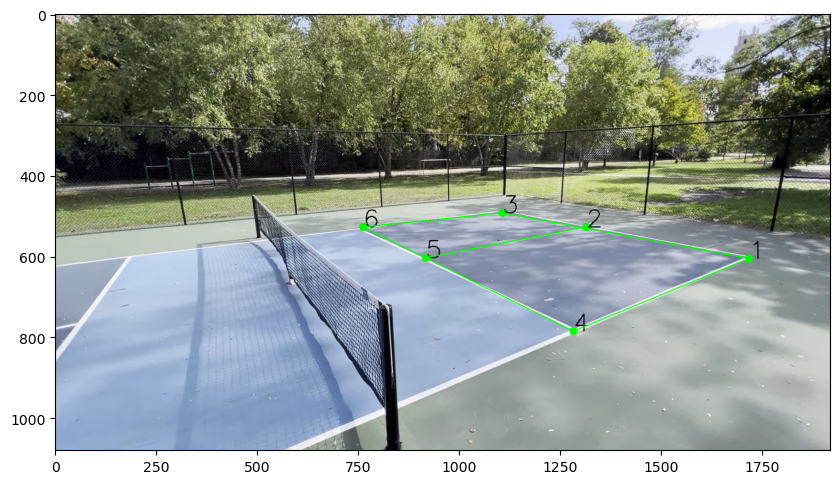

In [46]:
plot_image(plot_labels(sample_img, labels, withLines=True))

In [51]:
def show_prediction(model, dataset, frame):
    sample_img = cv2.imread(extracted_image_path(dataset, frame))
    sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(sample_img, (480, 270), interpolation=cv2.INTER_AREA)
    predictions = model.predict(resized.reshape(1, 270, 480, 3))
    labels = predictions[0]
    def group_points_by_2(points):
        # create list of points grouped by 2
        grouped_points = []
        for i in range(0, len(points), 2):
            grouped_points.append(points[i:i+2])
        return grouped_points
    labels = group_points_by_2(labels)
    print(labels)
    plot_image(plot_labels(sample_img, labels, withLines=True))
    
    

1/1 [==============================] - 0s 29ms/step
[array([1703.91  ,  621.7428], dtype=float32), array([1301.6956 ,  545.69226], dtype=float32), array([1096.0482 ,  508.00366], dtype=float32), array([1282.4921 ,  796.40845], dtype=float32), array([907.99457, 628.33234], dtype=float32), array([748.05237, 541.769  ], dtype=float32)]


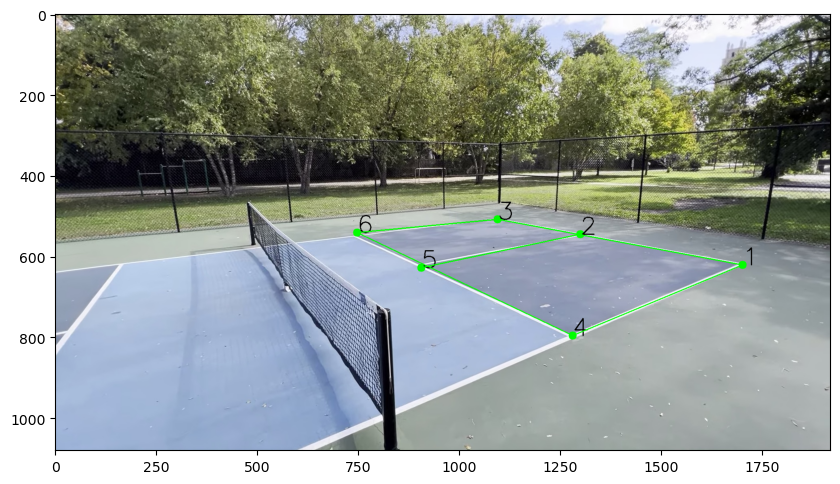

In [56]:
show_prediction(model, 'center_right_1', 40)

center_right_1 680
1/1 [==============================] - 0s 21ms/step
[array([1835.4683,  590.4854], dtype=float32), array([1397.7677 ,  506.86862], dtype=float32), array([1176.9624 ,  463.03113], dtype=float32), array([1329.2977,  755.8965], dtype=float32), array([965.428 , 561.5547], dtype=float32), array([831.17474, 486.72525], dtype=float32)]


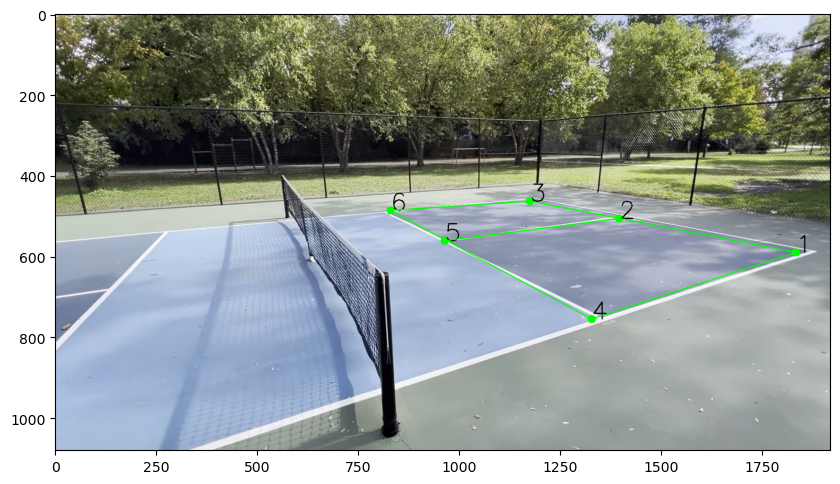

In [110]:
# show prediction on a random frame
import random
from defs.storage_locs import VALID_DATASETS
dataset = random.choice(VALID_DATASETS)
frame = random.randint(0, 100) * 10
print(dataset, frame)
show_prediction(model, dataset, frame)